###LOADING DATASETS AND LIBRARIES



*   Importing the necessary python libraries for statistical modeling




In [ ]:
import sys   # libraries
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas_profiling
sns.set()
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


*   Loading in German Credit Dataset






In [ ]:
from google.colab import files  # to open the file
uploaded = files.upload()

Saving german_credit..arff to german_credit..arff


In [ ]:

data_file="german_credit..arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



Creditability                         object
Account Balance                       object
Duration of Credit (month)           float64
Payment Status of Previous Credit     object
Purpose                               object
Credit Amount                        float64
Value Savings/Stocks                  object
Length of current employment          object
Instalment per cent                  float64
Sex & Marital Status                  object
Guarantors                            object
Duration in Current address           object
Most valuable available asset         object
Age (years)                          float64
Concurrent Credits                    object
Type of apartment                     object
No of Credits at this Bank           float64
Occupation                            object
No of dependents                     float64
Telephone                             object
Foreign Worker                        object
dtype: object


#PREDICTIVE MODELLING



##1.  CLEAN DATA




#####FEATURE SELECTION FOR MACHINE LEARNING

In [ ]:
# maame version
# removed Duration current address, Occupation, Telephone
SelectedColumns =['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'No of dependents', 'Foreign Worker']

In [ ]:
# other version
# removed Duration current address, Age, sex & marital status, telephone
SelectedColumns= ['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors',
       'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Foreign Worker']

In [ ]:
# Selecting final columns
MySelectedData=df[SelectedColumns]
MySelectedData.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Guarantors,Most valuable available asset,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,1,2,3,1,1.0,3,1.0,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,1,1,3,1,2.0,3,2.0,1
2,1,2,12.0,2,9,841.0,2,4,2.0,1,1,3,1,1.0,2,1.0,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,1,1,3,1,2.0,2,2.0,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,1,2,1,2,2.0,2,1.0,2


In [ ]:
# Printing all the column names for our reference
MySelectedData.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors', 'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank',
       'Occupation', 'No of dependents', 'Foreign Worker'],
      dtype='object')

In [ ]:
# maame version
# removed Duration current address, Occupation, Telephone
DepVariable= 'Creditability'
IndVariable=['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Most valuable available asset', 'Age (years)', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'No of dependents',
       'Foreign Worker']

X=df[IndVariable].values
y=df[DepVariable].values

In [ ]:
#redo
DepVariable= 'Creditability'
IndVariable=['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

X=df[IndVariable].values
y=df[DepVariable].values

In [ ]:
# other version
# removed Duration current address, Age, sex & marital status
DepVariable= 'Creditability'
IndVariable=['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Guarantors',
       'Most valuable available asset',
       'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Foreign Worker']
X=df[IndVariable].values
y=df[DepVariable].values

#####TRAINING DATA FOR PREDICTION

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=428)

In [ ]:
# Check samples
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 16)
(900,)
(100, 16)
(100,)


####DECISION TREE

In [ ]:
from sklearn import tree
Mytree = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
# Creating the model on Training Data
DTree=Mytree.fit(X_train,y_train)
prediction=DTree.predict(X_test)

In [ ]:
# Evaluation Matrix
print('CLEAN DATA: DECISION TREE EVALUATION MATRIX:')
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

CLEAN DATA: DECISION TREE EVALUATION MATRIX:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.84      0.90      0.87        72

    accuracy                           0.81       100
   macro avg       0.77      0.74      0.75       100
weighted avg       0.80      0.81      0.80       100



In [ ]:
print('CLEAN DATA: DECISION TREE CONFUSION MATRIX:')
print(metrics.confusion_matrix(y_test, prediction))


CLEAN DATA: DECISION TREE CONFUSION MATRIX:
[[16 12]
 [ 7 65]]


Accuracy of the model on Testing Sample Data: 0.8

Accuracy values  Cross Validation:
 [0.71225296 0.76902287 0.74604343 0.70952831 0.69011858 0.77519841
 0.79299848 0.69398679 0.61170635 0.63822844]

Final Average Accuracy of the model: 0.71


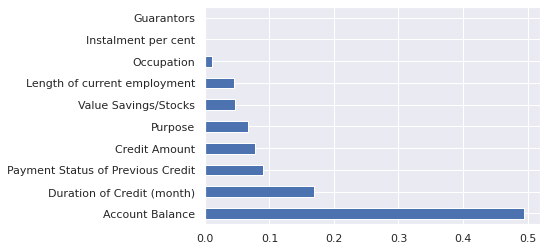

In [ ]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=IndVariable)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values  Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
#Installing the required library for plotting the decision tree
#!pip install dtreeplt

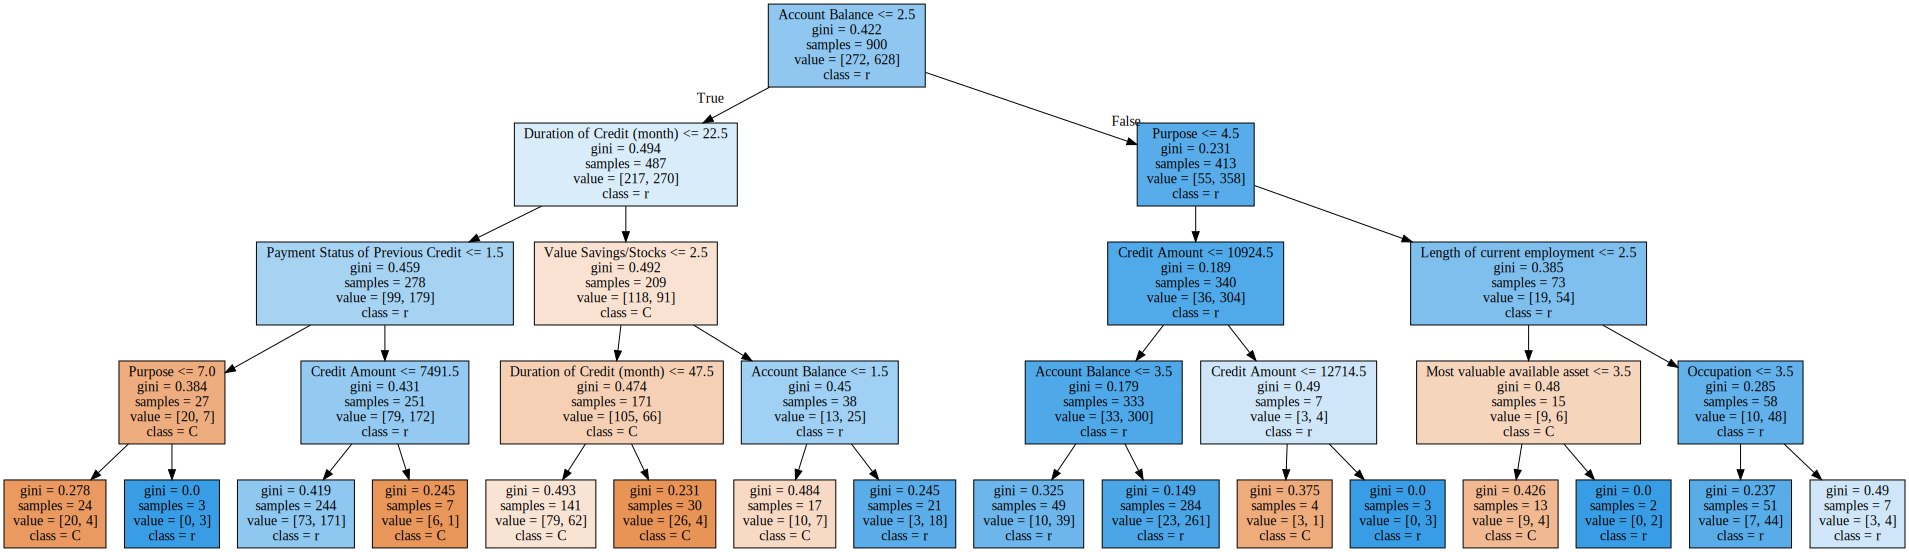

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(Mytree, out_file=None, 
                                feature_names=IndVariable,  
                                class_names=DepVariable,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

####NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
#using Gaussian as we want binomial classification
mybayes = MultinomialNB()

In [ ]:
NBmodel=bayes.fit(X_train,y_train)
prediction=NBmodel.predict(X_test)
# Evaluation matrix, Accuracy, Precision, Recall
print('CLEAN DATA: NAIVES BAYES EVALUATION MATRIX:')
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

NameError: ignored

In [ ]:
print('CLEAN DATA: NAIVE BAYES CONFUSION MATRIX')
print(metrics.confusion_matrix(y_test, prediction))

CLEAN DATA: NAIVE BAYES CONFUSION MATRIX
[[16 12]
 [ 7 65]]


#2. ORIGINAL DATA 

In [ ]:
from google.colab import files  # to open the file
uploaded = files.upload()

data_file="german_credit..arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')

Saving german_credit..arff to german_credit. (5).arff


We use all the features for the original data.

In [ ]:
# Separate Dependent Variable and Independent Variables
dependent_var='Creditability'
independent_var=['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

M=df[independent_var].values
n=df[dependent_var].values

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.1, random_state=1)

In [ ]:
# testing
print(M_train.shape)
print(n_train.shape)
print(M_test.shape)
print(n_test.shape)

(900, 20)
(900,)
(100, 20)
(100,)


####DECISION TREE

In [ ]:
#Decision Trees
from sklearn import tree
mytree_clas = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')
#  modeling Training Data
DTree=mytree_clas.fit(M_train,n_train)
prediction=DTree.predict(M_test)

In [ ]:
from sklearn import metrics
print('ORIGINAL DATA: DECISION TREE EVALUATION MATRIX')
print(metrics.classification_report(n_test, prediction))
# Printing  Overall Accuracy of the model
F1_Score=metrics.f1_score(n_test, prediction, average='weighted')
print('Accuracy of Test Sample:', round(F1_Score,2))

ORIGINAL DATA: DECISION TREE EVALUATION MATRIX
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.83      0.88      0.85        73

    accuracy                           0.78       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.77      0.78      0.77       100

Accuracy of Test Sample: 0.77


In [ ]:
print('ORIGINAL DATA: DECISION TREE CONFUSION MATRIX')
print(metrics.confusion_matrix(n_test, prediction))

ORIGINAL DATA: DECISION TREE CONFUSION MATRIX
[[14 13]
 [ 9 64]]


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(DTree, M , n, cv=10, scoring='f1_weighted')
print('\nAccuracy values :\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values :
 [0.71225296 0.76902287 0.74604343 0.68503119 0.68221388 0.77519841
 0.77229833 0.69398679 0.61170635 0.63822844]

Final Average Accuracy of the model: 0.71


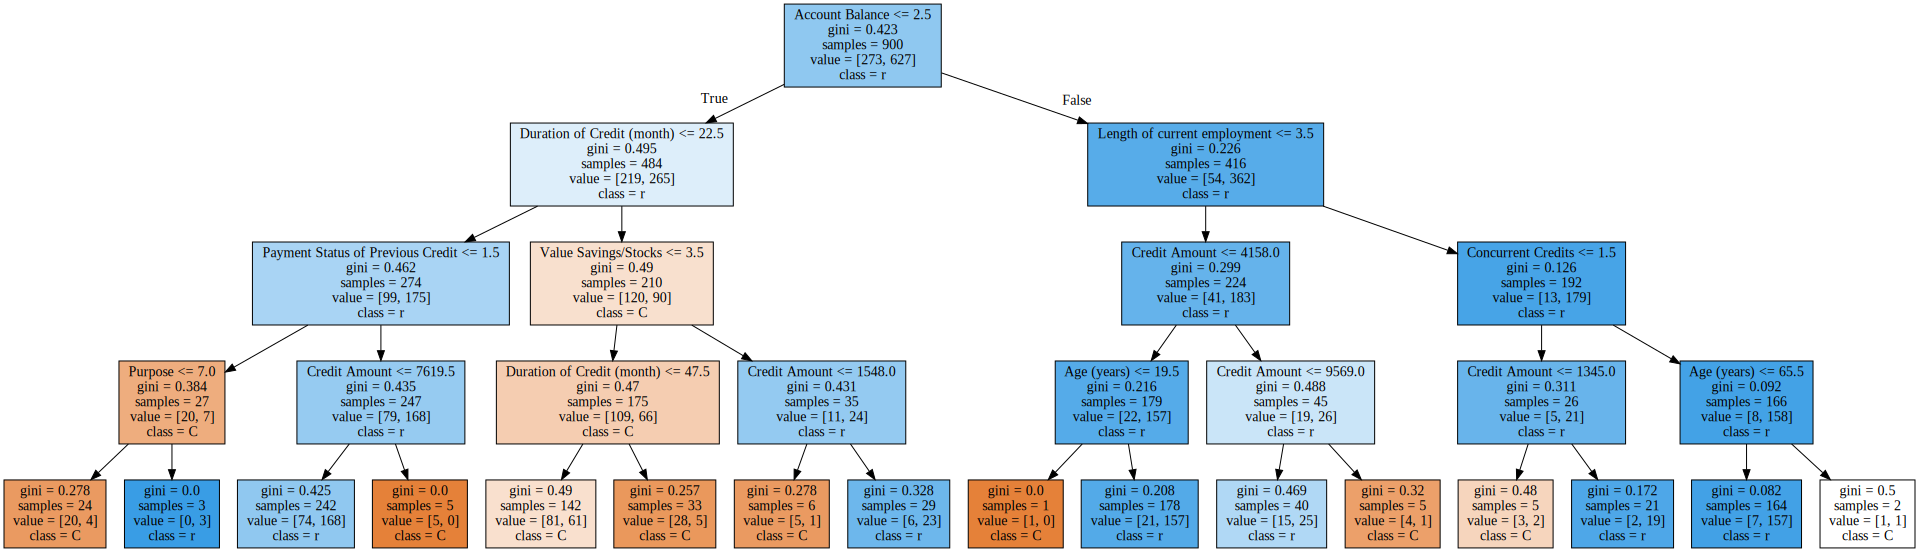

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(mytree_clas, out_file=None, 
                                feature_names=independent_var,  
                                class_names=dependent_var,
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="jpeg") 
graph

####NAIVE BAYES MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
mybayes = MultinomialNB()

In [ ]:
#parameters of bayes model
print(mybayes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
# Evaluation matrix, Accuracy, Precision, Recall
from sklearn import metrics
print('NAIVE BAYES EVALUATION MATRIX ORIGINAL DATA')
print(metrics.classification_report(n_test, prediction))

NAIVE BAYES EVALUATION MATRIX ORIGINAL DATA
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        27
           1       0.83      0.88      0.85        73

    accuracy                           0.78       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.77      0.78      0.77       100



In [ ]:
print('ORIGINAL DATA: NAIVE BAYES CONFUSION MATRIX')
print(metrics.confusion_matrix(n_test, prediction))

ORIGINAL DATA: NAIVE BAYES CONFUSION MATRIX
[[14 13]
 [ 9 64]]
